This analysis is in the order of Female then Male

In [2]:
install.packages('qtl') #Main package, for analysis
install.packages('qtlcharts') #accessory, for displaying graphs
install.packages('LinkageMapView') #accessory, for displaying linkage maps
install.packages('rcompanion')# for plotNormalHistogram

Installing package into 'C:/Users/daeda/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'qtl' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'qtl'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\daeda\OneDrive\Documents\R\win-library\3.6\00LOCK\qtl\libs\x64\qtl.dll to C:\Users\daeda\OneDrive\Documents\R\win-library\3.6\qtl\libs\x64\qtl.dll: Permission denied"
Warning message:
"restored 'qtl'"



The downloaded binary packages are in
	C:\Users\daeda\AppData\Local\Temp\RtmpCQl1Lr\downloaded_packages


Installing package into 'C:/Users/daeda/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'qtlcharts' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\daeda\AppData\Local\Temp\RtmpCQl1Lr\downloaded_packages


Installing package into 'C:/Users/daeda/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'LinkageMapView' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\daeda\AppData\Local\Temp\RtmpCQl1Lr\downloaded_packages


Installing package into 'C:/Users/daeda/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'rcompanion' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\daeda\AppData\Local\Temp\RtmpCQl1Lr\downloaded_packages


Warning message:
"package 'qtl' was built under R version 3.6.2"
Warning message:
"package 'qtlcharts' was built under R version 3.6.2"
Warning message:
"package 'LinkageMapView' was built under R version 3.6.2"
Warning message:
"package 'rcompanion' was built under R version 3.6.2"


In [1]:
library(qtl) #load packages
library(qtlcharts)
library(LinkageMapView)
library(rcompanion)

Warning message:
"package 'qtl' was built under R version 3.6.2"
Warning message:
"package 'qtlcharts' was built under R version 3.6.2"
Warning message:
"package 'LinkageMapView' was built under R version 3.6.2"
Warning message:
"package 'rcompanion' was built under R version 3.6.2"


In [2]:
#Collecting enviroment variables
print("Make sure to input names AS THEY APPEAR on the csv!!") #Just a user warning
fileName <- readline("Enter file name (Either FemaleMap.csv or MaleMap.csv): ") #Mapping table file
genotypeName <- c(readline("First Genotype (homozygous) (For example ll): "),
                  readline("Second Genotype (heterozygous) (for example lm): ")) #For example "nn", "np"
alleleName <- c(substr(genotypeName[2],1,1) ,substr(genotypeName[2],2,2))
naNames <- c("NA","--") #For example "NA", "--"
colNum <- as.numeric(readline("Column Number: ")) #Column for pheno of interest

[1] "Make sure to input names AS THEY APPEAR on the csv!!"


Enter file name (Either FemaleMap.csv or MaleMap.csv):  FemaleMap.csv
First Genotype (homozygous) (For example ll):  11
Second Genotype (heterozygous) (for example lm):  lm
Column Number:  24


Warning message in read.cross.csv(dir, file, na.strings, genotypes, estimate.map, :
"The following unexpected genotype codes were treated as missing.
    |ll|
"


 --Read the following data:
	 294  individuals
	 1100  markers
	 38  phenotypes


Warning message in summary.cross(cross):
"Some markers at the same position on chr 1,2,4,5,7,8,9,10,11,12,13,14,16,17,18,19; use jittermap()."
Warning message in summary.cross(cross):
"Strange genotype pattern on chr 19."


 --Cross type: bc 


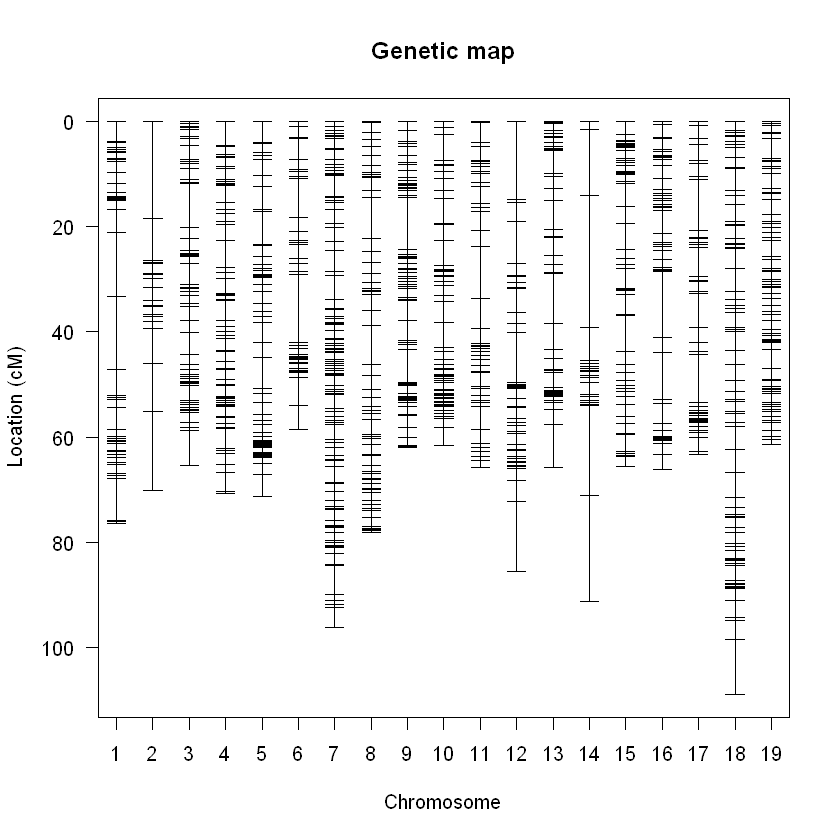

In [3]:
#Map generation
Map <- read.cross(format = 'csv',file = fileName 
                  ,genotypes = genotypeName,
                  alleles = alleleName,na.strings = naNames) #generate linkage map
Map <- jittermap(Map) #make sure no markers are in the same location
Map <- calc.genoprob(Map,step = 1,map.function = "kosambi") #associate markers with full genotypes
plot.map(Map) #draw linkage map

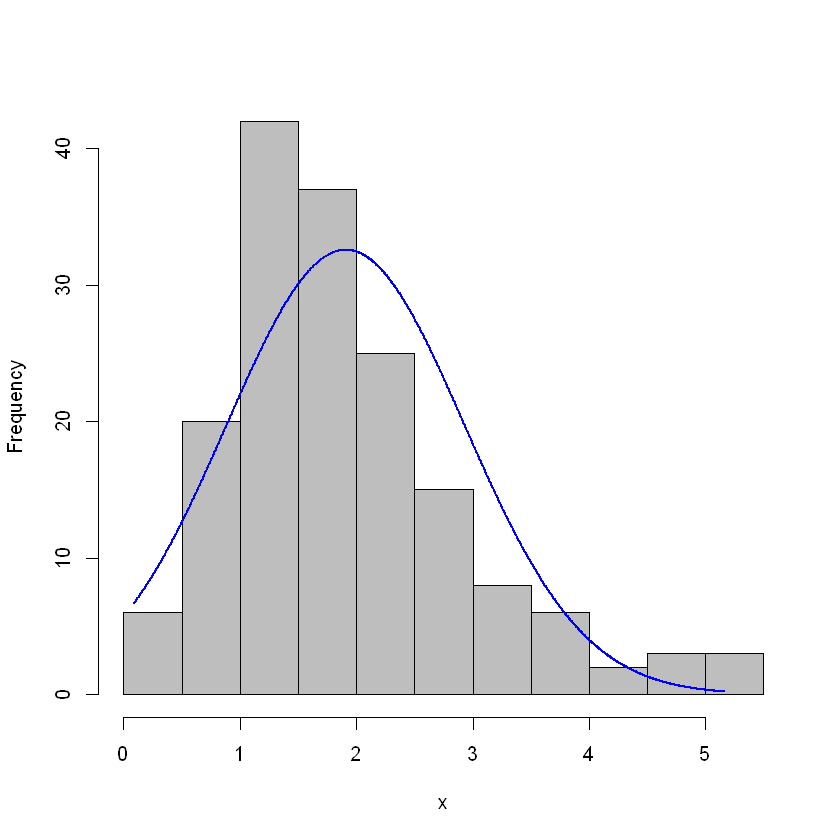

In [4]:
plotNormalHistogram(Map$pheno[,colNum]) #normal histogram of pheno of interest

Outliers exist in this dataset. Will need to be analyized. 

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addcovar appears to be over-specified; consider dropping columns.
"
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addcovar appears to be over-specified; consider dropping columns.
"
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addcovar appears to be over-specified; consider dropping columns.
"
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addcovar appears to be over-specified; consider dropping columns.
"
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addcovar appears to be over-specified; consider dropping columns.
"
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addcovar appears to be over-specified; consider dropping columns.
"
Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"addc

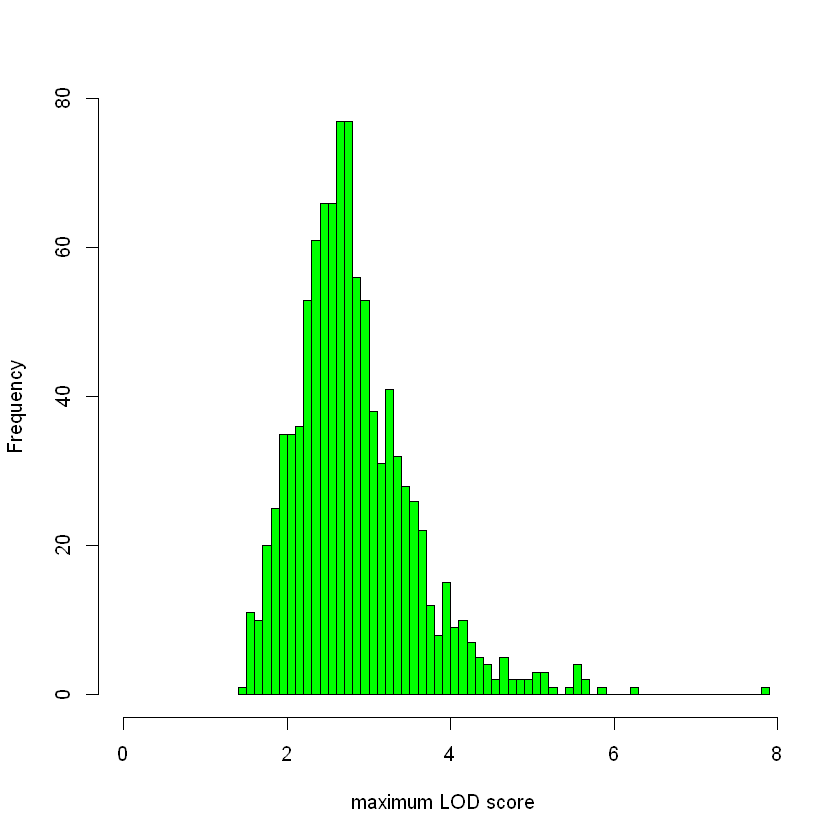

In [5]:
#Compute statistically significant values
TraitCIM1000 <- cim(Map,pheno.col = colNum,method = "hk",
                    map.function = "kosambi",n.perm = 1000) # Function will take a moment to run, determines LOD value
plot(TraitCIM1000,col = 'green') #show distribution of lod scores
LOD5 <- summary(TraitCIM1000)[1]

[1] "If nothing shows up, the values \n      are below the LOD5 score"


,chr,pos,lod
,<fct>,<dbl>,<dbl>
c1.loc28,1,28.000000,2.7648650
2_3268584,2,31.537010,0.9807633
c3.loc47,3,47.000000,1.7748087
4_4708744,4,16.662018,1.3726574
5_23612814,5,63.580055,1.3777687
c6.loc55,6,55.000000,1.6605738
7_2809369,7,9.318015,0.8819157
8_19851783,8,69.873052,2.1542231
c9.loc30,9,30.000000,1.0082952


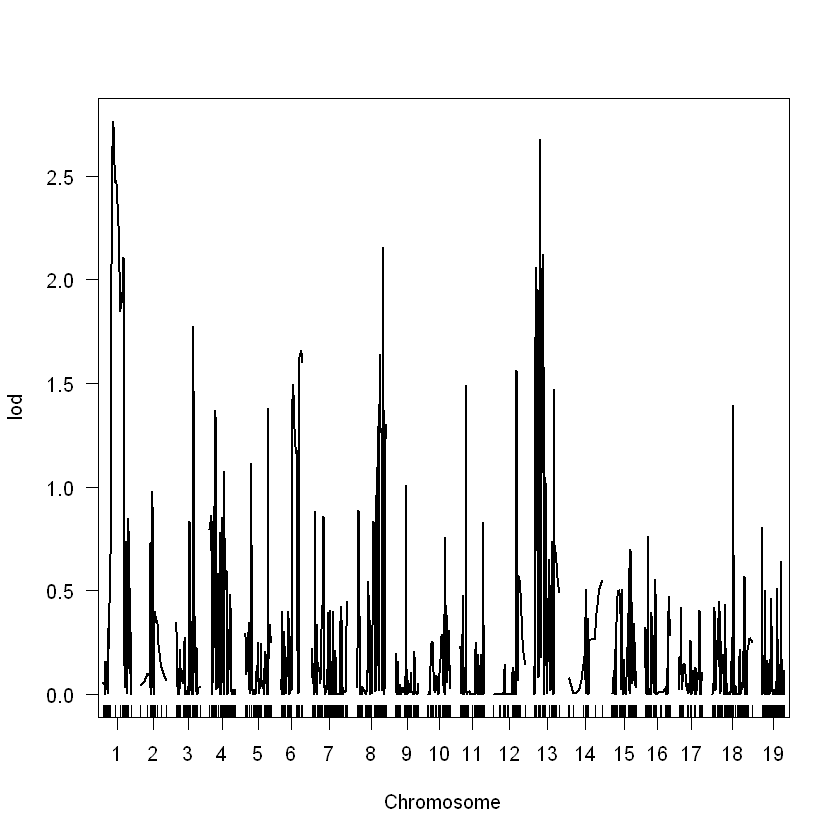

In [6]:
#Deterime LOD Values
TraitCIM<-cim(Map,pheno.col = colNum,method = "hk",
              map.function = "kosambi") #Generate LOD Values
plot(TraitCIM) #show LOD graph
abline(h = LOD5,col = "blue") #overlay statistically significant line
print("If nothing shows up, the values 
      are below the LOD5 score") #warning for no peaks
summary(TraitCIM)

In [7]:
#Collecting enviroment variables
print("Make sure to input names AS THEY APPEAR on the csv!!") #Just a user warning
fileName <- readline("Enter file name (Either FemaleMap.csv or MaleMap.csv): ") #Mapping table file
genotypeName <- c(readline("First Genotype (homozygous) (For example ll): "),
                  readline("Second Genotype (heterozygous) (for example lm): ")) #For example "nn", "np"
alleleName <- c(substr(genotypeName[2],1,1) ,substr(genotypeName[2],2,2))
naNames <- c("NA","--") #For example "NA", "--"
colNum <- as.numeric(readline("Column Number: ")) #Column for pheno of interest

[1] "Make sure to input names AS THEY APPEAR on the csv!!"


Enter file name (Either FemaleMap.csv or MaleMap.csv):  MaleMap.csv
First Genotype (homozygous) (For example ll):  nn
Second Genotype (heterozygous) (for example lm):  np
Column Number:  24


 --Read the following data:
	 294  individuals
	 1128  markers
	 38  phenotypes


Warning message in summary.cross(cross):
"Some markers at the same position on chr 1,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19; use jittermap()."


 --Cross type: bc 


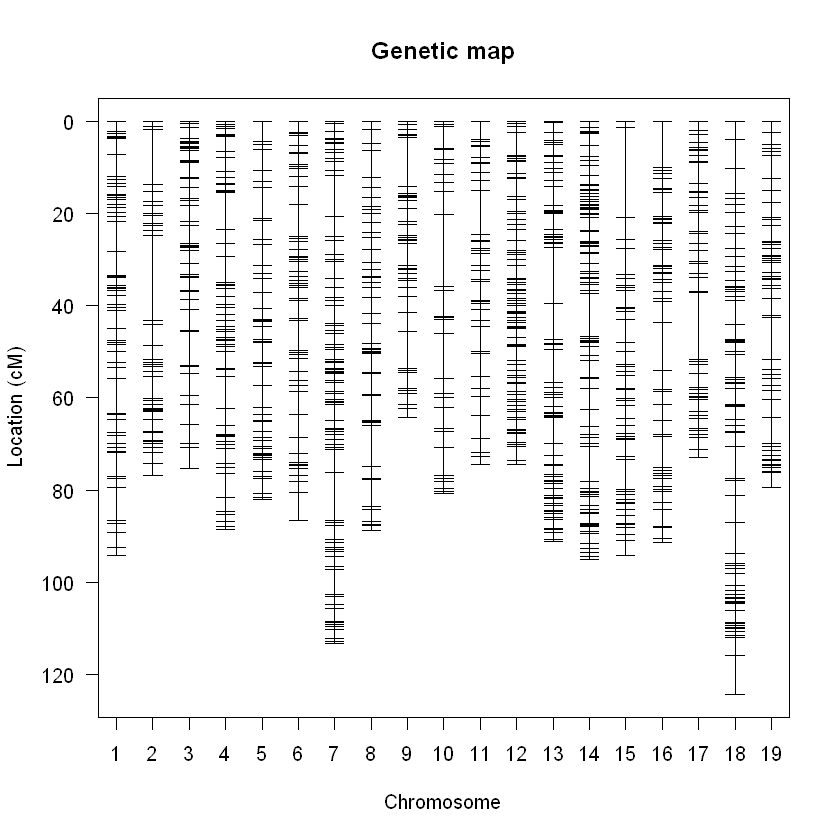

In [8]:
#Map generation
Map <- read.cross(format = 'csv',file = fileName 
                  ,genotypes = genotypeName,
                  alleles = alleleName,na.strings = naNames) #generate linkage map
Map <- jittermap(Map) #make sure no markers are in the same location
Map <- calc.genoprob(Map,step = 1,map.function = "kosambi") #associate markers with full genotypes
plot.map(Map) #draw linkage map

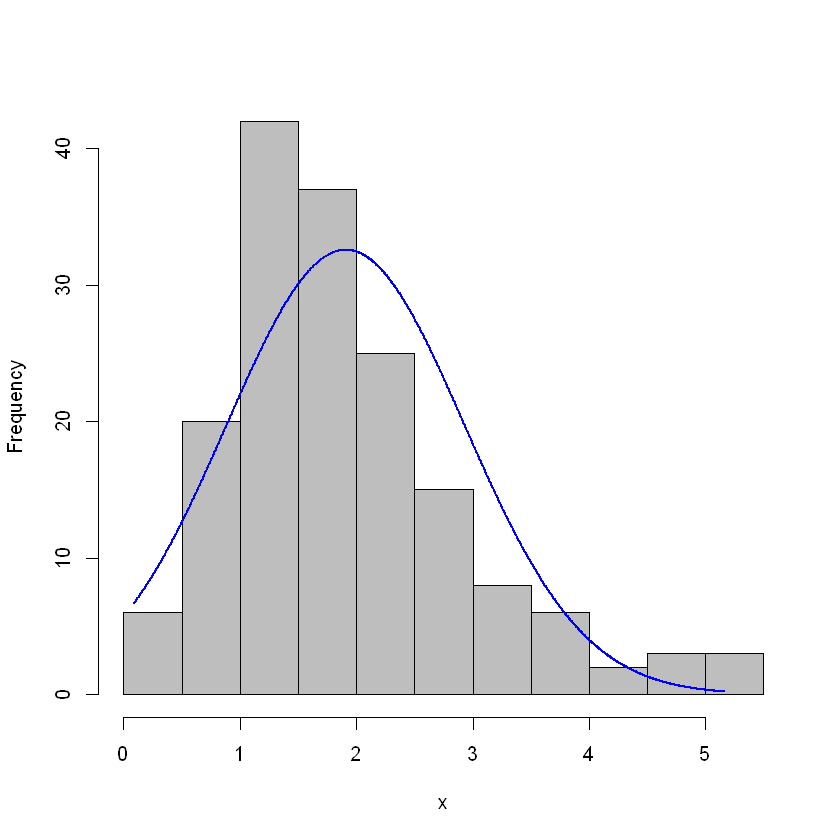

In [9]:
plotNormalHistogram(Map$pheno[,colNum]) #normal histogram of pheno of interest

Outliers exist in this data. 

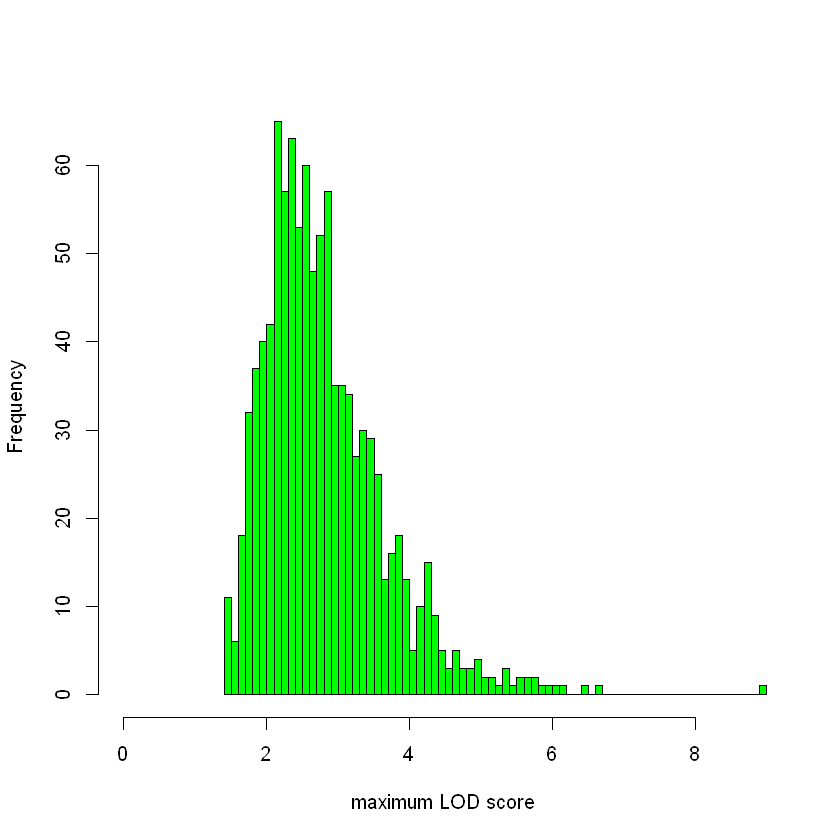

In [10]:
#Compute statistically significant values
TraitCIM1000 <- cim(Map,pheno.col = colNum,method = "hk",
                    map.function = "kosambi",n.perm = 1000) # Function will take a moment to run, determines LOD value
plot(TraitCIM1000,col = 'green') #show distribution of lod scores
LOD5 <- summary(TraitCIM1000)[1]

[1] "If nothing shows up, the values \n      are below the LOD5 score"


,chr,pos,lod
,<fct>,<dbl>,<dbl>
13_14783587,1,94.101062,2.6220998
2_4115561,2,18.351006,0.8432344
c3.loc65,3,65.000000,1.2390756
c4.loc45,4,45.000000,0.8739014
5_11718096,5,47.931024,0.3219489
c6.loc58,6,58.000000,1.3158477
c7.loc56,7,56.000000,1.4851838
c8.loc22,8,22.000000,1.8260225
9_1015693,9,3.051004,0.7156107


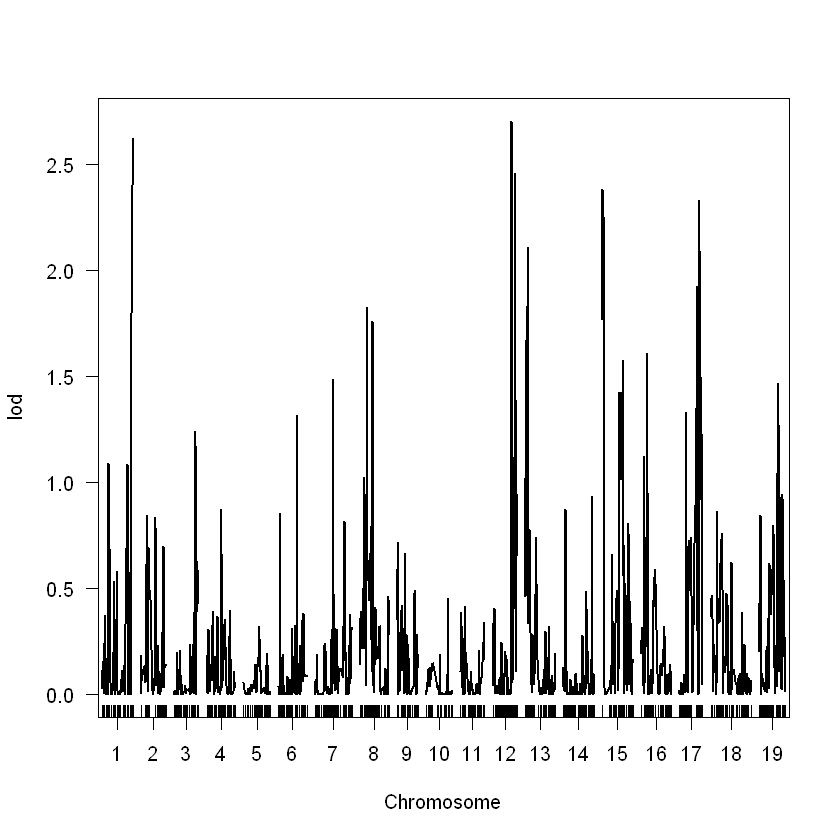

In [11]:
#Deterime LOD Values
TraitCIM<-cim(Map,pheno.col = colNum,method = "hk",
              map.function = "kosambi") #Generate LOD Values
plot(TraitCIM) #show LOD graph
abline(h = LOD5,col = "blue") #overlay statistically significant line
print("If nothing shows up, the values 
      are below the LOD5 score") #warning for no peaks
summary(TraitCIM)